## Import packages and set seed

- It is highly probable that the folder "auxiliary_scripts" will change its name in the future.
- If this happens then it would be converted into a package called "wavesuite_auxiliary_scripts" and it would have to be installed and imported

In [1]:
#It is highly probable that this folder will change its name in th future
import sys

sys.path.insert(0, '../../auxiliary_scripts/')

In [2]:
import time  
import numpy as np

from torch_geometric.loader import DataLoader

In [3]:
#import AE_Models
from train_AE_functions import set_seed, train_AE, model_MSE_error 

from graph_functions import create_graph_data_list_vtu_file 
from plot_results_vtu import plot_model_2d_vtu, compare_three_plots_models_2d_vtu 

from rank_models import plot_losses , rank_losses

In [4]:
set_seed(42)

True

## Create the list of Data objects where each element is a graph

In [5]:
location = '../../../Datasets/air_pollution_data/2d_canyon_' 
start_index = 0
end_index = 401

vtu_file_locations_air = [ location + str(i) + '.vtu' for i in range(start_index, end_index)]
features_list_air = ['TracerBackground']  

In [6]:
graph_data_list_air, n_points = create_graph_data_list_vtu_file(vtu_file_locations_air, features_list_air)

In [7]:
graph_data_list_air[0]

Data(x=[852, 1], edge_index=[2, 2419])

## Shuffle graph_data_list before splitting

In [8]:
#Compute the number of graphs
n_graphs = len(graph_data_list_air)

#Compute one random permutation
permutation0 = np.random.permutation(n_graphs)

In [9]:
shuffle = True

if shuffle:
    #Reorganize graph_data_list taking into account the previous random permutation
    input_graph_data_list = [graph_data_list_air[entry] for entry in permutation0]
else: 
    input_graph_data_list = graph_data_list_air

## Create DataLoaders

In [10]:
n_graphs = len(input_graph_data_list)

graph_data_list_train = input_graph_data_list[:int(n_graphs * 0.8)]
graph_data_list_validation = input_graph_data_list[int(n_graphs * 0.8):int(n_graphs * 0.9)]
graph_data_list_test = input_graph_data_list[int(n_graphs * 0.9):]

print(len(graph_data_list_train))
print(len(graph_data_list_validation))
print(len(graph_data_list_test))

320
40
41


In [11]:
NUM_GRAPHS_PER_BATCH = 32

train_loader = DataLoader(graph_data_list_train, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
validation_loader = DataLoader(graph_data_list_validation, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(graph_data_list_test, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

## Let's train some models

In [12]:
#This dictionary stores the losses results of the models
results_models = {}

In [13]:
#These are the models specifications
num_features = 1  #This is always 1
# latent_space_dim = 32
num_epochs = 50  

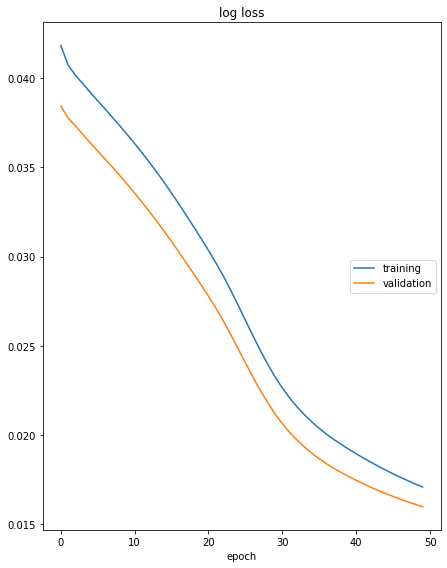

log loss
	training         	 (min:    0.017, max:    0.042, cur:    0.017)
	validation       	 (min:    0.016, max:    0.038, cur:    0.016)

 Number of parameters:  7694
Time taken:  11.742796182632446


In [14]:
start = time.time()

latent_space_dim = 2
model_name = 'classic_AE_latDim2'
embedding_sequence = None # There is no embedding sequence for classic AE, just input None

model1, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type='classic_AE_Sequential', 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

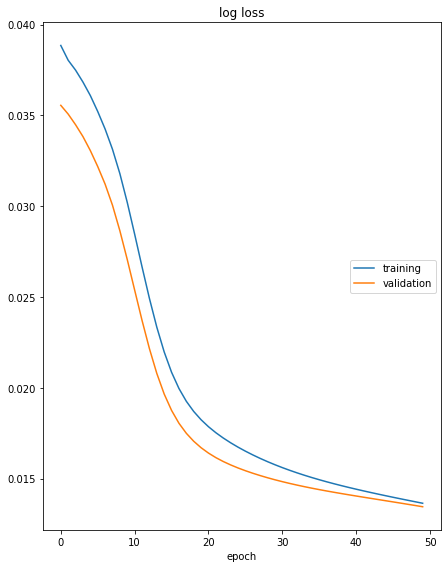

log loss
	training         	 (min:    0.014, max:    0.039, cur:    0.014)
	validation       	 (min:    0.013, max:    0.036, cur:    0.013)

 Number of parameters:  14568
Time taken:  10.432953119277954


In [15]:
start = time.time()

latent_space_dim = 4
model_name = 'classic_AE_latDim4'
embedding_sequence = None # There is no embedding sequence for classic AE, just input None

model2, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type='classic_AE_Sequential', 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

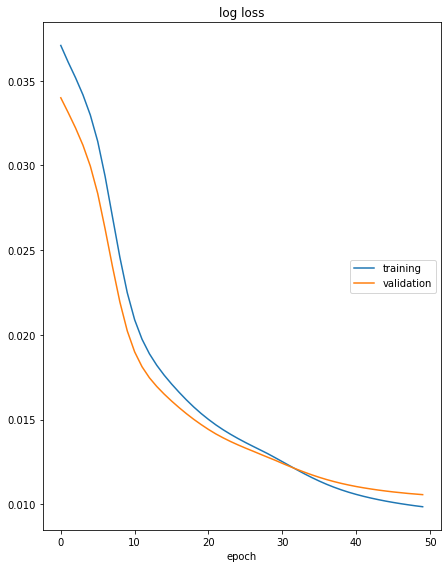

log loss
	training         	 (min:    0.010, max:    0.037, cur:    0.010)
	validation       	 (min:    0.011, max:    0.034, cur:    0.011)

 Number of parameters:  28412
Time taken:  10.263748168945312


In [16]:
start = time.time()

latent_space_dim = 8
model_name = 'classic_AE_latDim8'
embedding_sequence = None # There is no embedding sequence for classic AE, just input None

model3, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type='classic_AE_Sequential', 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

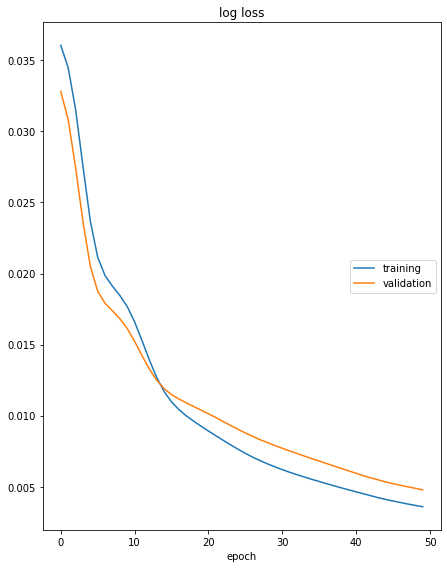

log loss
	training         	 (min:    0.004, max:    0.036, cur:    0.004)
	validation       	 (min:    0.005, max:    0.033, cur:    0.005)

 Number of parameters:  56484
Time taken:  10.39355993270874


In [17]:
start = time.time()

latent_space_dim = 16
model_name = 'classic_AE_latDim16'
embedding_sequence = None # There is no embedding sequence for classic AE, just input None

model4, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type='classic_AE_Sequential', 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

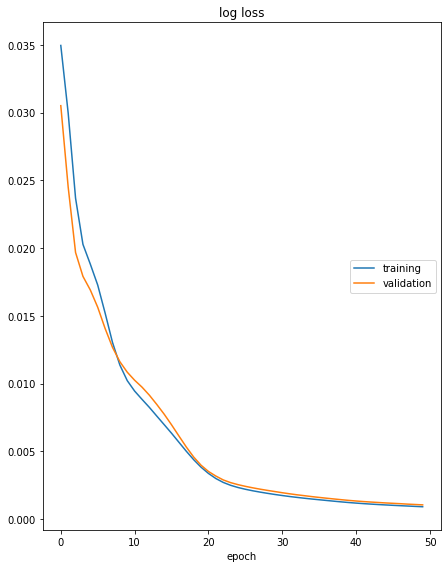

log loss
	training         	 (min:    0.001, max:    0.035, cur:    0.001)
	validation       	 (min:    0.001, max:    0.031, cur:    0.001)

 Number of parameters:  114164
Time taken:  10.36675238609314


In [18]:
start = time.time()

latent_space_dim = 32
model_name = 'classic_AE_latDim32'
embedding_sequence = None # There is no embedding sequence for classic AE, just input None

model5, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type='classic_AE_Sequential', 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

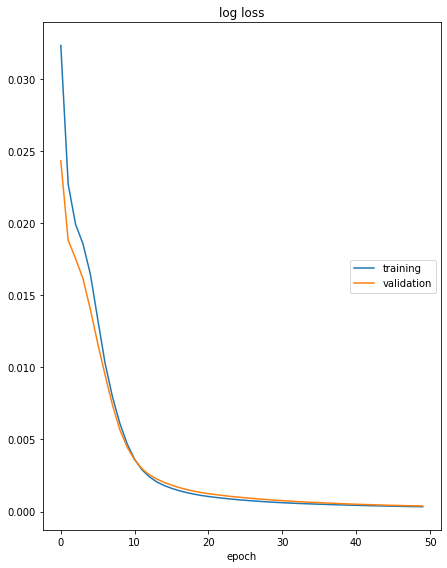

log loss
	training         	 (min:    0.000, max:    0.032, cur:    0.000)
	validation       	 (min:    0.000, max:    0.024, cur:    0.000)

 Number of parameters:  235668
Time taken:  10.284773588180542


In [19]:
start = time.time()

latent_space_dim = 64
model_name = 'classic_AE_latDim64'
embedding_sequence = None # There is no embedding sequence for classic AE, just input None

model6, results_models[model_name] = train_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type='classic_AE_Sequential', 
                                                num_epochs=num_epochs)

end = time.time()

print('Time taken: ',end-start) 

## MSE results

In [20]:
models_names = list( results_models.keys() )

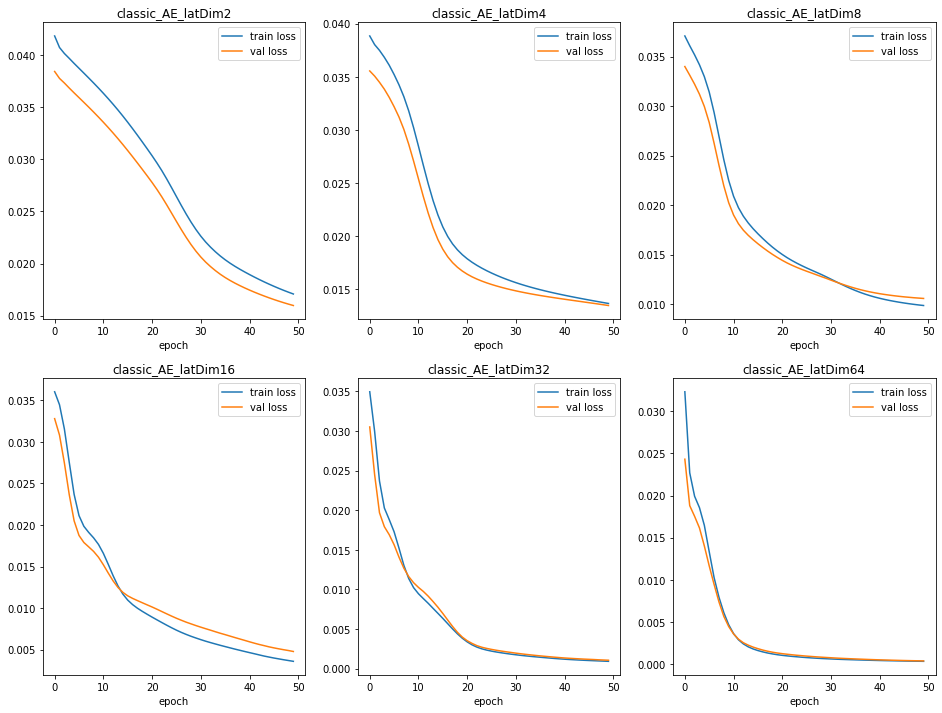

In [21]:
# filename = 'air_pollution_sequential_models_losses.png'
plot_losses(results_models, models_names, figsize=(16,12)
                   # , filename=filename
           )

In [22]:
rank_losses(results_models, models_names, selected_epoch = int(num_epochs/4) )

,variants_name,final_validation_loss
0,classic_AE_latDim64,0.002964
1,classic_AE_latDim32,0.009741
2,classic_AE_latDim16,0.014223
3,classic_AE_latDim8,0.018122
4,classic_AE_latDim4,0.023711
5,classic_AE_latDim2,0.033048


In [23]:
rank_losses(results_models, models_names, selected_epoch = int(num_epochs/2) )

,variants_name,final_validation_loss
0,classic_AE_latDim64,0.001002
1,classic_AE_latDim32,0.002547
2,classic_AE_latDim16,0.009037
3,classic_AE_latDim8,0.013510
4,classic_AE_latDim4,0.015580
5,classic_AE_latDim2,0.024842


In [24]:
# first_column_model_name = 'Model1'
filename = 'air_pollution_diffLatentDimensions.csv'

df_losses = rank_losses(results_models, models_names, selected_epoch = num_epochs,
                       # first_column_model_name = first_column_model_name, 
                        filename = filename )

df_losses

CSV was saved


,variants_name,final_validation_loss
0,classic_AE_latDim64,0.000385
1,classic_AE_latDim32,0.001055
2,classic_AE_latDim16,0.004776
3,classic_AE_latDim8,0.010574
4,classic_AE_latDim4,0.013445
5,classic_AE_latDim2,0.015974


In [25]:
# print( 'model1 error: ', model_MSE_error(model1, test_loader) )
# print( 'model2 error: ', model_MSE_error(model2, test_loader) )
# print( 'model3 error: ', model_MSE_error(model3, test_loader) )
# print( 'model4 error: ', model_MSE_error(model4, test_loader) )

# Plot the results

In [26]:
filename_to_copy_structure = '../../../Datasets/air_pollution_data/2d_canyon_0.vtu'

Indexes plotted [1, 10, 20, 39]


C:\Users\angel\Anaconda3\envs\second-try-alienware\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


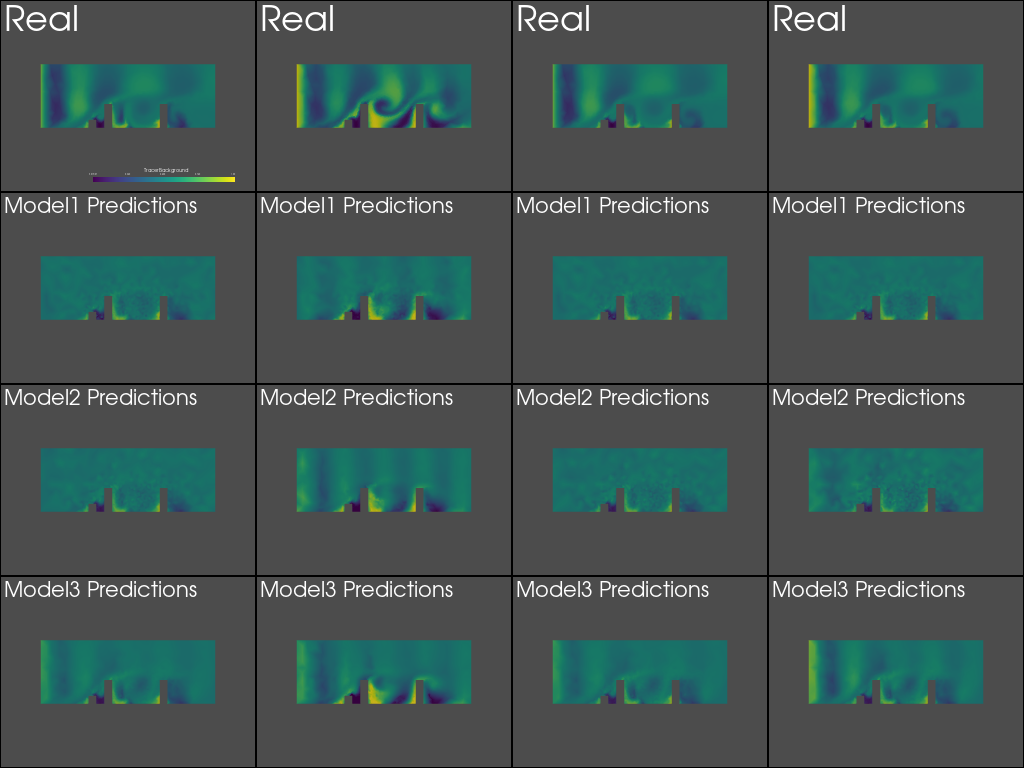

In [27]:
compare_three_plots_models_2d_vtu(model1, model2, model3, 
                            graph_data_list_test, 4 , filename_to_copy_structure, 
                            random=False, index_sequence=[ 1, 10, 20, 39]  
                                 # ,save_fig=True, filename='air_pollution__sequentialmodels_decompressed.eps'
                                 )

Indexes plotted [1, 10, 20, 39]


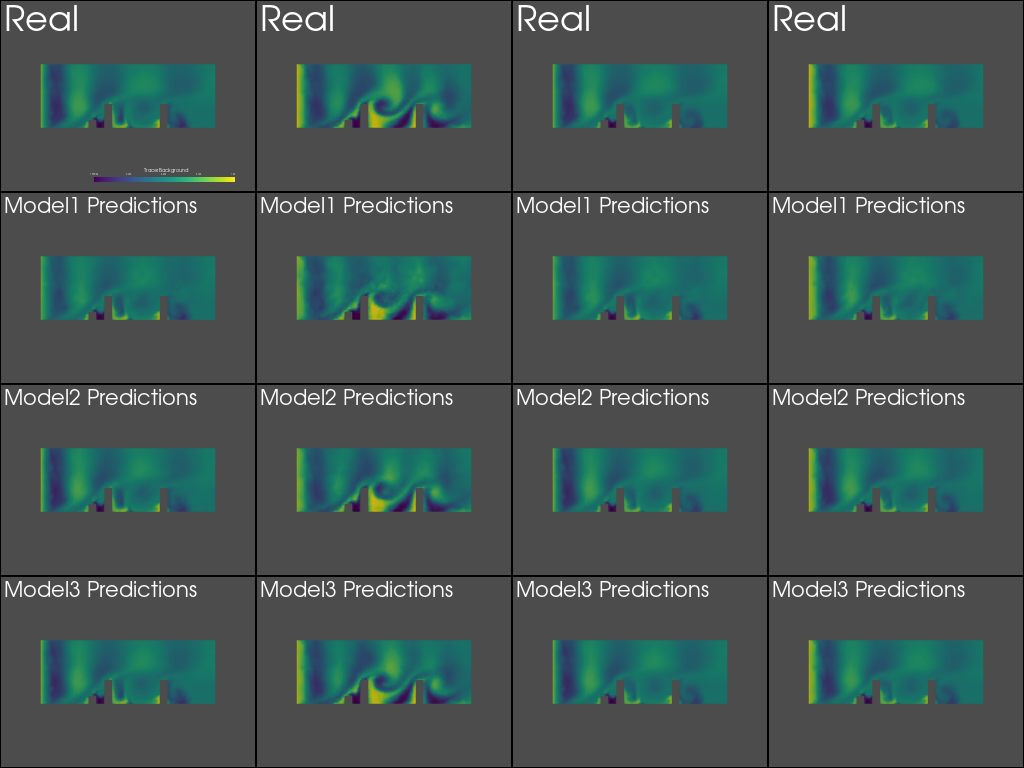

In [28]:
compare_three_plots_models_2d_vtu(model4, model5, model6, 
                            graph_data_list_test, 4 , filename_to_copy_structure, 
                            random=False, index_sequence=[ 1, 10, 20, 39]  
                                 # ,save_fig=True, filename='air_pollution__sequentialmodels_decompressed.eps'
                                 )